In [ ]:
# Choose a random number of 6 digits. Make sure that you keep a copy of this number and avoid trivial numbers, such as 000000 or 123456 -- thank you!
281734

# Assignment 1 - Visualisation and Performance Evaluation

First assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados 

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Please enter your code in the designated areas of the notebook. You can create additional code cells to experiment with, but __make sure to place your final solutions where they are requested in the notebook.__
* The notebook already imports all the necessary libraries for this assignment at the beginning. Although you are allowed to import other libraries, it is not necessary.
* Before submitting your work, make sure to rename the file to your random number that you created above (for example, 289479.ipynb).

## Notebook Overview:

1. [Data Loading and Visualisation](#Data-Loading-and-Visualisation) (20%)
2. [Binary Classification Building a ROC curve](#Binary-Classification-Building-a-ROC-curve) (50%)
3. [Regression RMSE](#Regression-RMSE) (30%)

In [1]:
%matplotlib inline
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

## Data Loading and Visualisation

* Load the Iris dataset that you downloaded from the following link: https://www.kaggle.com/datasets/uciml/iris/download?datasetVersionNumber=2
* __Important:__ to ensure proper execution of your code, you need to either place the downloaded .csv file in the same working directory as the program or specify the correct path to the file.
* Load the data into a pandas `DataFrame`
* For each feature in the dataset, create a figure with two subplots one on top of the other.
    * In the first subplot, plot a histogram of the values of the feature for all classes combined. 
    * In the second subplot, plot a histogram of the values of the feature for each class separately. Use the column “Species” as the class identifier, and a different color for each class. 
    

* __Note:__ the data contains a column "Id" that you can ignore. 

In [2]:
# Load the data

# Your code goes here
irisdf = pd.read_csv('iris.csv')
irisdf.head(-1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica


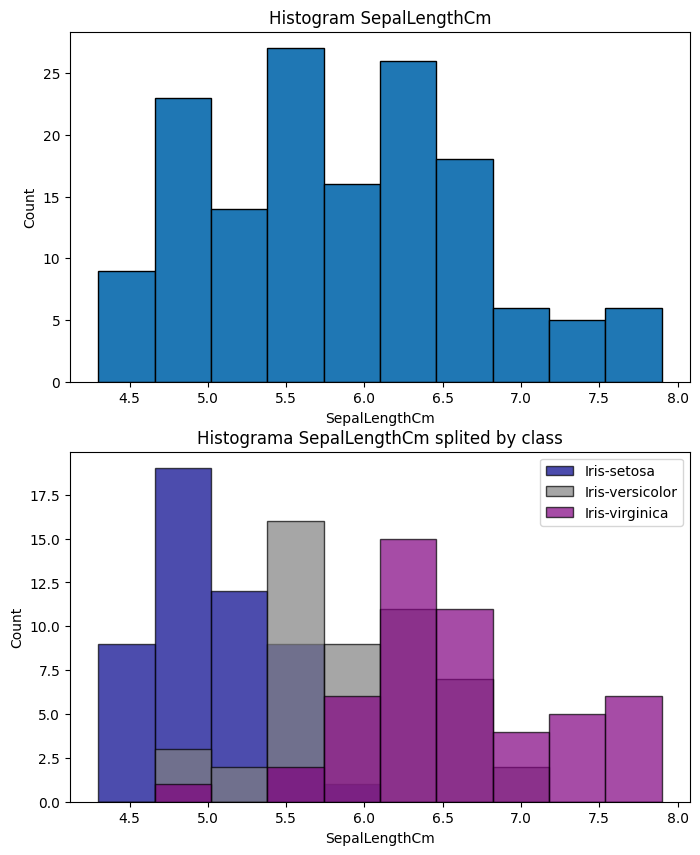

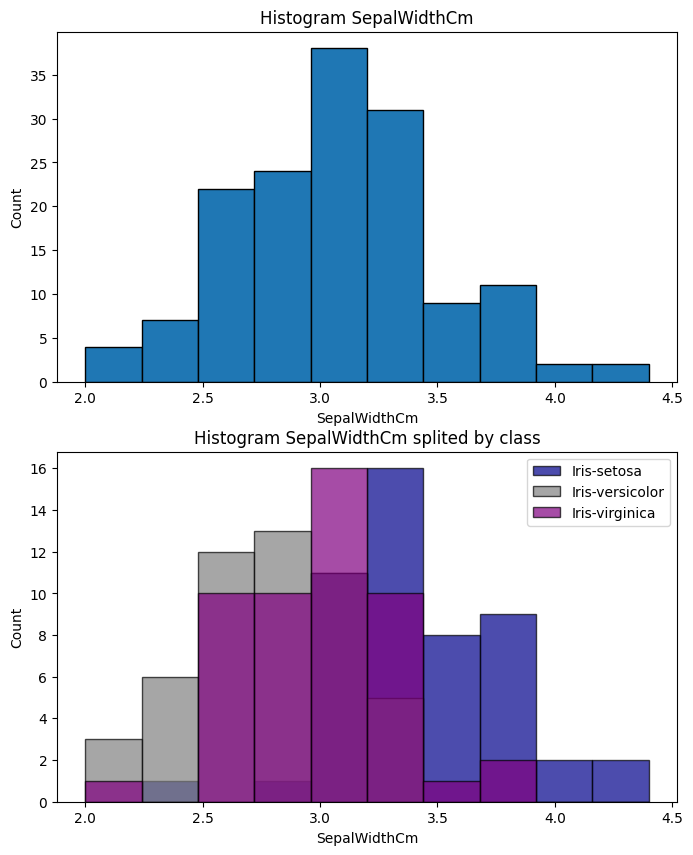

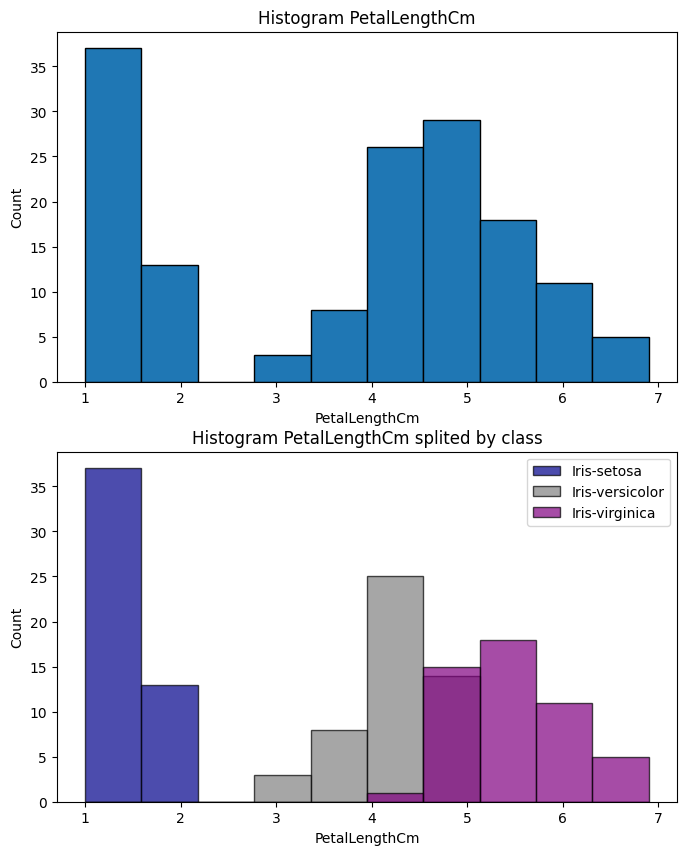

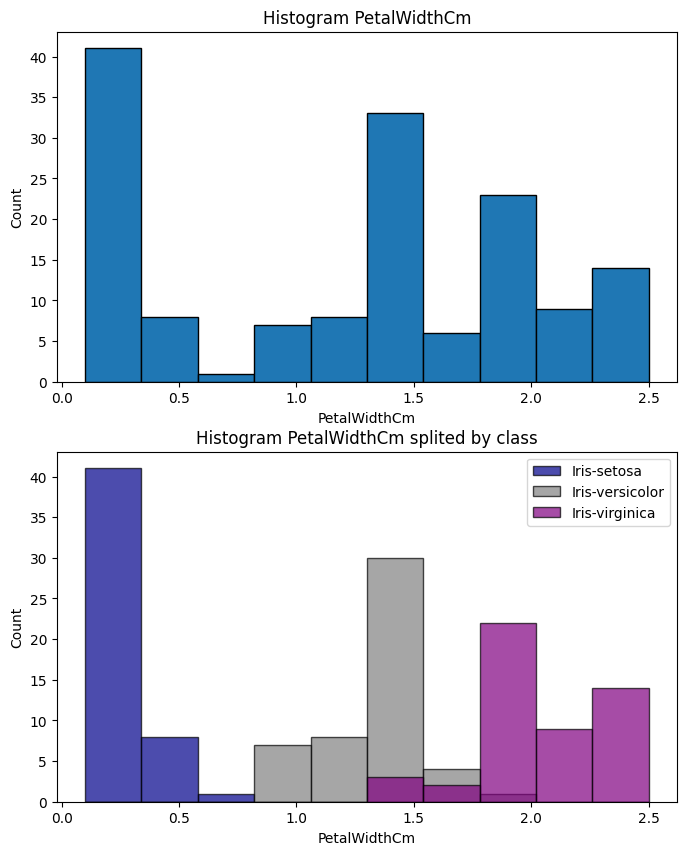

In [3]:
# The code for your plots go here

#Primeira feature: SepalLengthCm

# Fazendo uma figura com dois plots um em cima do outro
fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(8, 10))

# Primeiro subplot
ax1.hist(irisdf['SepalLengthCm'], edgecolor='black', linewidth=1)
ax1.set_xlabel('SepalLengthCm')
ax1.set_ylabel('Count')
ax1.set_title('Histogram SepalLengthCm')

# Second subplot

#Usando os valores máximos e mínimos de cada classe garantimos que as barras do histograma terão o mesmo tamanho
min_valor = irisdf['SepalLengthCm'].min()
max_valor = irisdf['SepalLengthCm'].max()
#Número desejado de barras
num_bins = 10

#Cores utilizadas
cores = ['darkblue', 'grey', 'purple', 'red', 'orange']

#Para cada valor único na coluna Species Usaremos uma cor diferente no segundo histograma
classes = irisdf['Species'].unique()
for i, classe in enumerate(classes):
    ax2.hist(irisdf[irisdf['Species'] == classe]['SepalLengthCm'], bins=10, color=cores[i],range=(min_valor, max_valor), alpha=0.7, edgecolor='black', linewidth=1, label=classe)

# Configurando os rótulos dos eixos e o título do gráfico do segundo subplot
ax2.legend()
ax2.set_xlabel('SepalLengthCm')
ax2.set_ylabel('Count')
ax2.set_title('Histograma SepalLengthCm splited by class')

# Exibindo o gráfico
plt.legend()
plt.show()

# Basicamente repetiremos os mesmos passos para os outros features #

#Segunda feature: SepalWidthCm
fig, (ax3,ax4) = plt.subplots(nrows=2, figsize=(8, 10))

ax3.hist(irisdf['SepalWidthCm'], edgecolor='black', linewidth=1)
ax3.set_xlabel('SepalWidthCm')
ax3.set_ylabel('Count')
ax3.set_title('Histogram SepalWidthCm')

min_valor = irisdf['SepalWidthCm'].min()
max_valor = irisdf['SepalWidthCm'].max()
num_bins = 10

cores = ['darkblue', 'grey', 'purple', 'red', 'orange']

classes = irisdf['Species'].unique()
for i, classe in enumerate(classes):
    ax4.hist(irisdf[irisdf['Species'] == classe]['SepalWidthCm'], bins=10, color=cores[i],range=(min_valor, max_valor), alpha=0.7, edgecolor='black', linewidth=1, label=classe)
ax4.legend()
ax4.set_xlabel('SepalWidthCm')
ax4.set_ylabel('Count')
ax4.set_title('Histogram SepalWidthCm splited by class')

plt.legend()
plt.show()

#Terceira feature: PetalLengthCm
fig, (ax5,ax6) = plt.subplots(nrows=2, figsize=(8, 10))

ax5.hist(irisdf['PetalLengthCm'], edgecolor='black', linewidth=1)
ax5.set_xlabel('PetalLengthCm')
ax5.set_ylabel('Count')
ax5.set_title('Histogram PetalLengthCm')

min_valor = irisdf['PetalLengthCm'].min()
max_valor = irisdf['PetalLengthCm'].max()
num_bins = 10

cores = ['darkblue', 'grey', 'purple', 'red', 'orange']

classes = irisdf['Species'].unique()
for i, classe in enumerate(classes):
    ax6.hist(irisdf[irisdf['Species'] == classe]['PetalLengthCm'], bins=10, color=cores[i],range=(min_valor, max_valor), alpha=0.7, edgecolor='black', linewidth=1, label=classe)
ax6.legend()
ax6.set_xlabel('PetalLengthCm')
ax6.set_ylabel('Count')
ax6.set_title('Histogram PetalLengthCm splited by class')

plt.legend()
plt.show()

#Quarta feature: PetalWigthCm
ig, (ax7,ax8) = plt.subplots(nrows=2, figsize=(8, 10))

ax7.hist(irisdf['PetalWidthCm'], edgecolor='black', linewidth=1)
ax7.set_xlabel('PetalWidthCm')
ax7.set_ylabel('Count')
ax7.set_title('Histogram PetalWidthCm')

min_valor = irisdf['PetalWidthCm'].min()
max_valor = irisdf['PetalWidthCm'].max()
num_bins = 10

cores = ['darkblue', 'grey', 'purple', 'red', 'orange']

classes = irisdf['Species'].unique()
for i, classe in enumerate(classes):
    ax8.hist(irisdf[irisdf['Species'] == classe]['PetalWidthCm'], bins=10, color=cores[i],range=(min_valor, max_valor), alpha=0.7, edgecolor='black', linewidth=1, label=classe)
ax8.legend()
ax8.set_xlabel('PetalWidthCm')
ax8.set_ylabel('Count')
ax8.set_title('Histogram PetalWidthCm splited by class')

plt.legend()
plt.show()

#As colunas ID e Species foram ignoradas, pois a análise não faria sentido

## Binary Classification Building a ROC curve

The goal of this exercise is to evaluate the performance of various pre-trained classification models in predicting whether a mushroom is edible or poisonous. To achieve this, we will generate ROC curves for each algorithm and determine the area under the curve. Using these metrics, we will decide which classifier is best suited for the task.

Follow the instructions in the cells below to complete this task.

In [4]:
# Loading the pre-trained classifiers and testing data
classifiers = pkl.load(open('classifiers_dict.p','rb'))
mushroom_test_data = pkl.load(open('mushroom_test_data.p','rb'))

The loaded variables are dictionaries. One contains the pre-trained classifiers and the other one the testing data. 

Let's inspect the contents of the classifiers_dict

In [5]:
classifiers

{'Categorical NB': CategoricalNB(),
 'Logistic Regression': LogisticRegression(max_iter=600),
 'SVM': SVC(probability=True),
 'Gradient Boosting': GradientBoostingClassifier()}

* We can see that the key is the name of the classifier and the value contains the pre-trained instance of each classifier. 
* In the next code cell there's code to extract the classifiers into separate variables.

In [6]:
cnb_clf = classifiers['Categorical NB']
lr_clf = classifiers['Logistic Regression']
svm_clf = classifiers['SVM']
gb_clf = classifiers['Gradient Boosting']

Next we'll extract the testing data from the mushroom_test_data dictionary we just loaded.

First, let's inspect the keys of the dictionary (we don't look at the values because the data is rather large and we don't want it to take up the whole screen).

In [7]:
mushroom_test_data.keys()

dict_keys(['X_test', 'y_test'])

* X_test contains the data points with their features that will serve as the input to our trained models.
* y_test contains the true labels for the testing set, which we'll use to evaluate our predictions.

In [8]:
X_test = mushroom_test_data['X_test']
y_test = mushroom_test_data['y_test']

As we can see below, X_test contains the 21 features that were used to train the different classifiers. 
* __Note__ that the index is shuffled because this is a random subset of the original data that we are using as our testing set.

In [9]:
X_test.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
700,5,2,4,1,6,1,0,1,10,0,...,2,2,7,7,2,1,4,2,3,1
6743,2,2,2,0,8,1,0,1,0,1,...,1,2,6,6,2,1,0,7,4,0
1571,5,0,8,0,5,1,1,0,4,1,...,2,0,7,7,2,1,0,2,0,1
5949,5,3,4,0,5,1,1,1,10,0,...,0,2,7,4,2,1,0,7,4,2
3307,2,3,4,1,5,1,0,0,5,1,...,2,2,7,6,2,1,4,3,5,0


During class we looked at the case where the output of the classifier is a number between 0 and 1. This is the case for the classifiers we will use here. For these classifiers this output can be interpreted as the probabilities.

We are now going to obtain the predicted probabilities from our different classifiers
* To do this we are using the method `predict_proba()`
* This is a method specific to each classifier and it requires as input argument the datapoints of our testing set with their features (`X_test`).

In [10]:
y_proba_cnb = cnb_clf.predict_proba(X_test)
y_proba_svm = svm_clf.predict_proba(X_test)
y_proba_lr = lr_clf.predict_proba(X_test)
y_proba_gb = gb_clf.predict_proba(X_test)

Let's inspect one of the variables we just created. 

We notice that it contains two values per row that sum up to 1. The first value is the probability of class 0 and the second value is the probability of class 1.

__For this exercise, you will use only the second column (probability of class 1) as was explained in class.__

In [11]:
y_proba_cnb

array([[0.63072618, 0.36927382],
       [0.37364811, 0.62635189],
       [0.77859425, 0.22140575],
       ...,
       [0.64840617, 0.35159383],
       [0.75075631, 0.24924369],
       [0.6507491 , 0.3492509 ]])

## Calculating the false positive and true positive rates
Now that we have our predicted values and the true labels, we are ready to calculate the ROC curve

Feel free to define the function(s) in a way that you find most comfortable. The goal of these functions is to generate the False Positive Rates (FPRs) and True Positive Rates (TPRs) at different thresholds for all classifiers.

The cell below contains a suggestion on how you can structure the function -- you can also do it differently if you prefer.

In [ ]:
# The following is just example code, it is not meant to be executed.
def get_fpr_tpr(predicted_values, true_labels, threshold):
    # body of the function
    return fpr, tpr
# this function would calculate the confusion matrix and then the fpr and tpr and return it as two separate values. 

# to then use the output values of this function you would do something like:
fpr, tpr = get_fpr_tpr(y_proba_lr, y_test, threshold)

In [30]:
# Your code goes here!!
def get_fpr_tpr(predicted_values, true_labels, threshold):
    """
    Calcula a taxa de falsos positivos e a taxa de verdadeiros positivos dados um array de probabilidades
    previstas e um array de rótulos reais, usando um threshold especificado.

    Args:
        predicted_values (array): Array de probabilidades previstas do modelo.
        true_labels (array): Array de rótulos reais.
        threshold (array): Array de valores de zero a um do threshold a serem usados para determinar as amostras positivas e negativas.

    Returns:
        list: Lista com as taxas de falsos positivos (fpr).
        list: Lista com as taxas de verdadeiros positivos (tpr).
    """
    #colocaremos as fprs e tprs individuais nas duas seguintes listas
    fpr = []
    tpr = []
    
    # Obtendo as previsões binárias usando o threshold
    for i in threshold:
        y_pred = (predicted_values[:, 1] >= i).astype(int)
    
        # Calcula as métricas de classificação
        tp = ((y_pred == 1) & (true_labels == 1)).sum()
        tn = ((y_pred == 0) & (true_labels == 0)).sum()
        fp = ((y_pred== 1) & (true_labels == 0)).sum()
        fn = ((y_pred == 0) & (true_labels == 1)).sum()
        
        # Calculando as taxas de fpr e tpr
        fpr_value = fp / (fp + tn)
        tpr_value = tp / (tp + fn)

        fpr.append(fpr_value)
        tpr.append(tpr_value)
    return fpr, tpr

## Plotting the ROC curve
Now let's use the calculated FPRs and TPRs to plot the ROC curves for the different classifiers.

The template below provides the typical structure of a superimposed plot, but you're welcome to modify it to fit your needs.

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


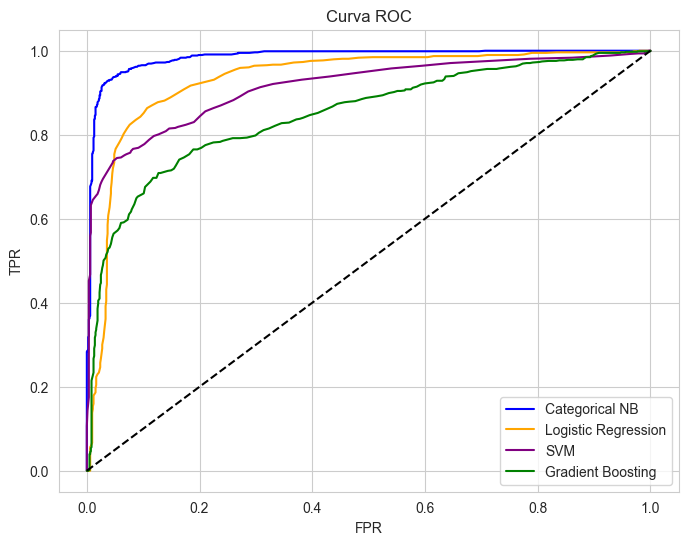

In [32]:
# Here you must complete the calls to plt.plot() with the right input arguments
# Following that you will need to generate the correct plot properties below
fig = plt.figure(figsize=(8,6))
# ROC Curve for the Categorical Naive Bayes
fpr, tpr = get_fpr_tpr(y_proba_cnb, y_test, np.linspace(0, 1, 1000))
plt.plot(fpr, tpr,color='blue', label='Categorical NB')
# ROC Curve for Logistic Regression
fpr2, tpr2 = get_fpr_tpr(y_proba_lr, y_test, np.linspace(0, 1, 1000))
plt.plot(fpr2, tpr2,color='orange', label='Logistic Regression')
# ROC Curve for SVM
fpr3, tpr3 = get_fpr_tpr(y_proba_svm, y_test, np.linspace(0, 1, 1000))
plt.plot(fpr3, tpr3,color='purple', label='SVM')
# ROC Curve for Gradient Boosting
fpr4, tpr4 = get_fpr_tpr(y_proba_gb, y_test, np.linspace(0, 1, 1000))
plt.plot(fpr4, tpr4,color='green', label='Gradient Boosting')

diagonal_x = [0, 1]
diagonal_y = [0, 1]

plt.plot(diagonal_x, diagonal_y, color='black', linestyle='dashed')

# Plot properties
# Title
plt.title('Curva ROC')
# X-Ticks and X-label 
plt.xlabel('FPR')
# Y-Ticks and Y-label
plt.ylabel('TPR')
# Legend
plt.legend()
plt.show()

## BONUS (10% extra marks)
You get bouns points if you make the plot using a single call to a plotting function.
* _Tip: use pandas and seaborn for this_

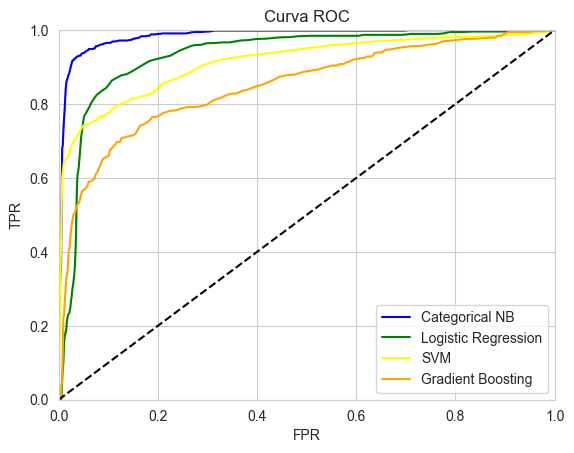

In [18]:
# Your code goes here
# Fazendo um dataframe com os valores de fpr e tpr de cada modelo
roc_data = pd.DataFrame({'fpr_cnb': fpr, 'tpr_cnb': tpr,
                         'fpr_lr': fpr2, 'tpr_lr': tpr2,
                         'fpr_svm': fpr3, 'tpr_svm': tpr3,
                         'fpr_gb': fpr4, 'tpr_gb': tpr4})

# usando os fpr e tpr as cores e os labels necessários chamaremos todos plots em apenas um
sns.set_style('whitegrid')
data_plot=[['fpr_cnb', 'tpr_cnb', 'blue', 'Categorical NB'], 
           ['fpr_lr', 'tpr_lr', 'green', 'Logistic Regression'], 
           ['fpr_svm', 'tpr_svm', 'yellow', 'SVM'], 
           ['fpr_gb', 'tpr_gb', 'orange', 'Gradient Boosting']]
for i in data_plot:
    #plot único
    sns.lineplot(x=i[0], y=i[1], data=roc_data, color=i[2], label=i[3])

# Há um segundo plot, mas apenas para inserir a diagonal
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Propriedades do plot
plt.title('Curva ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])

# mostrar plot
plt.show()


## Area under the curve
You are not expected to code a function to calculate the area under the ROC curve. Instead you have to use the provided function: `roc_auc_score()` to obtain this value. 

_Make sure to check the relevant documentation for this sklearn function._
* __Important: remember that we only care about the second column of our predicted probabilities!__

In [20]:
# Fill in your code where necessary
cnb_auroc =  roc_auc_score(y_test, y_proba_cnb[:,1])
print("The AUROC for the Categorical Naive Bayes classifier is: {}".format(cnb_auroc))
svm_auroc = roc_auc_score(y_test, y_proba_svm[:,1])
print("The AUROC for the SVM classifier is: {}".format(svm_auroc))
lr_auroc = roc_auc_score(y_test, y_proba_lr[:,1])
print("The AUROC for the Logistic Regression classifier is: {}".format(lr_auroc))
gb_auroc = roc_auc_score(y_test, y_proba_gb[:,1])
print("The AUROC for the Gradient Boosting classifier is: {}".format(gb_auroc))

The AUROC for the Categorical Naive Bayes classifier is: 0.9848335927048353
The AUROC for the SVM classifier is: 0.9138818358041882
The AUROC for the Logistic Regression classifier is: 0.9315289570838755
The AUROC for the Gradient Boosting classifier is: 0.8482282347873306


After analyzing the ROC curves and calculating the area under the curves, it should be apparent that the Categorical Naive Bayes classifier outperforms the other classifiers and is the most suitable option for this particular problem.

## Regression RMSE

The final exercise of this coursework requires you to calculate the Root Mean Squared Error (RMSE) of a linear regression model that predicts house prices.

In [22]:
# Load the data and the pre-trained model
boston_testing_data = pkl.load(open('boston_testing_data.p','rb'))
linear_regression_model = pkl.load(open('linear_regression_model.p','rb'))

Again, we extract the testing features and the true values in separate variables. 
* __Important:__ I use different variable names because X_test and y_test are being used for exercise 2. There's no need for this, but just to avoid confusion and to not step on pre-existing variables

In [23]:
X_test_boston = boston_testing_data['X_test']
y_test_boston = boston_testing_data['y_test']

Let's now obtain the predicted values

In [24]:
y_predict_lin_reg = linear_regression_model.predict(X_test_boston)

## Calculating RMSE
Now you have to write code to calculate the root mean squared error on the testing set for the linear regression model we just loaded.
At the end, just print the RMSE value for verification.

In [25]:
# Your code goes here
rmse = np.sqrt(((y_test_boston - y_predict_lin_reg)**2).mean())
print(rmse)


0.19420633754814495


## BONUS (5% extra marks)
You get this bonus marks if you are able to calculate the RMSE by vectorising your code, that is, no loops whatsoever.

In [ ]:
# Your code for the bonus marks goes here

